In [ ]:
pip install plasmapy

In [4]:
import plasmapy

 **E×B drift**


 The positive and negative particles drift in a direction perpendicular to the electric and magnetic field directions! This is called E-cross-B drift, sometimes written ExB drift from the mathematical notation.To understand why this is, consider just the motion of the positive particle. As the particle accelerates in the electric field, the magnetic field starts directing the particle in a curved path. The faster the particle, the larger the radius of the curved path. Eventually, the curving of the path redirects the positive particle so it is moving in a direction opposite the electric field. Through this region, the electric field acts to slow down the particle, and the curvature of the path gets smaller. The net effect of these competing motions is a net motion perpendicular to the fields. The negative particle is accelerated in the opposite sense by the electric field, which gives a net motion in the same direction.

In [5]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u
from mpl_toolkits.mplot3d import Axes3D

from plasmapy import formulary, particles

Initialize proton in uniform B field

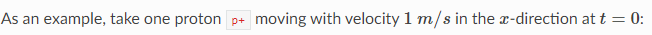

In [6]:

B = 5 * u.T
proton = particles.Particle("p+")
omega_c = formulary.frequencies.gyrofrequency(B, proton)
v_perp = 1 * u.m / u.s
r_L = formulary.lengths.gyroradius(B, proton, Vperp=v_perp)

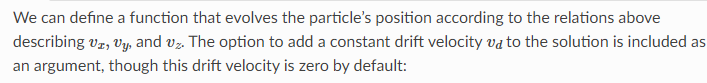

In [7]:
def single_particle_trajectory(v_d=np.array([0, 0, 0])):
    # Set time resolution & velocity such that proton goes 1 meter along B per rotation
    T = 2 * math.pi / omega_c.value  # rotation period
    v_parallel = 1 / T * u.m / u.s
    dt = T / 1e2 * u.s

    # Set initial particle position
    x = []
    y = []
    xt = 0 * u.m
    yt = -r_L

    # Evolve motion
    timesteps = np.arange(0, 10 * T, dt.value)
    for t in list(timesteps):
        v_x = v_perp * math.cos(omega_c.value * t) + v_d[0]
        v_y = v_perp * math.sin(omega_c.value * t) + v_d[1]
        xt += +v_x * dt
        yt += +v_y * dt
        x.append(xt.value)
        y.append(yt.value)
    x = np.array(x)
    y = np.array(y)
    z = v_parallel.value * timesteps

    return x, y, z

Executing with the default argument and plotting the particle trajectory gives the expected helical motion, with a radius equal to the Larmor radius.

In [8]:
x, y, z = single_particle_trajectory()

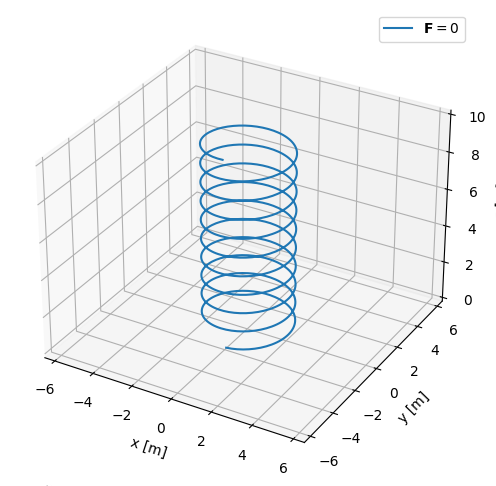

In [9]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x, y, z, label="$\mathbf{F}=0$")
ax.legend()
bound = 3 * r_L.value
ax.set_xlim([-bound, bound])
ax.set_ylim([-bound, bound])
ax.set_zlim([0, 10])
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_zlabel("z [m]")
plt.show()

In [10]:
print(f"r_L = {r_L.value:.2e} m")
print(f"omega_c = {omega_c.value:.2e} rads/s")

r_L = 2.09e-09 m
omega_c = 4.79e+08 rads/s


Built in drift functions allow you to account for the new force added to the system in two different ways

In [11]:
E = 0.2 * u.V / u.m  # E-field magnitude
ey = np.array([0, 1, 0])
ez = np.array([0, 0, 1])
F = proton.charge * E  # force due to E-field

v_d = formulary.drifts.force_drift(F * ey, B * ez, proton.charge)
print("F drift velocity: ", v_d)
v_d = formulary.drifts.ExB_drift(E * ey, B * ez)
print("ExB drift velocity: ", v_d)

F drift velocity:  [0.04 0.   0.  ] m / s
ExB drift velocity:  [0.04 0.   0.  ] m / s


The resulting particle trajectory can be compared to the case without drifts by calling our previously defined function with the drift velocity now as an argument. As expected, there is a constant drift in the direction of ExB

In [12]:
x_d, y_d, z_d = single_particle_trajectory(v_d=v_d)

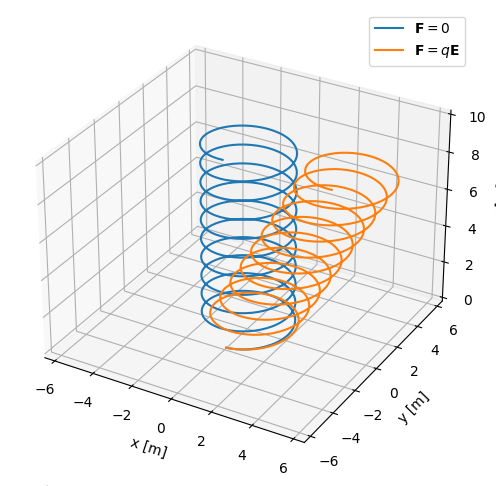

In [13]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x, y, z, label="$\mathbf{F}=0$")
ax.plot(x_d, y_d, z_d, label="$\mathbf{F}=q\mathbf{E}$")

bound = 3 * r_L.value
ax.set_xlim([-bound, bound])
ax.set_ylim([-bound, bound])
ax.set_zlim([0, 10])
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_zlabel("z [m]")
ax.legend()
plt.show()

In [14]:
print(f"r_L = {r_L.value:.2e} m")
print(f"omega_c = {omega_c.value:.2e} rads/s")

r_L = 2.09e-09 m
omega_c = 4.79e+08 rads/s


Conclusion:

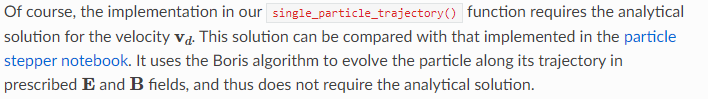